In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
import tensorflow as tf

C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        'E:\\Drowsiness\\sleep',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 14188 images belonging to 2 classes.


In [6]:
print(train_generator.class_indices)

{'alert': 0, 'drowsy': 1}


In [7]:
validation_generator = test_datagen.flow_from_directory(
        'E:\\Drowsiness\\val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 3971 images belonging to 2 classes.


In [8]:
print(validation_generator.class_indices)

{'alert': 0, 'drowsy': 1}


In [9]:
test_generator = test_datagen.flow_from_directory(
        'E:\\Drowsiness\\test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1386 images belonging to 2 classes.


In [10]:
print(test_generator.class_indices)

{'alert': 0, 'drowsy': 1}


In [34]:
drowsiness = [0,10]

In [ ]:
data = []
labels = []
image_paths = 'E:/Drowsiness/dataset/face_image/'

for Respondent in range(50):
    for i in range(20):
        for drows in drowsiness:
            name_img = str(Respondent) +'_'+str(i+1)+'_'+str(drows)
            image = cv2.imread(image_paths+name_img+'.jpg')
            
            if image is not None:
                image = cv2.resize(image, (100, 100))
                cv2.imshow('image',image)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                
                if drows == 10:
                    drows = 1
                labels.append(drows)
                data.append(image)
cv2.destroyAllWindows()

In [35]:
X_test = []
y_test = []
image_paths = 'E:/Drowsiness/dataset/face_image/'

for Respondent in range(50,61):
    for i in range(200):
        for drows in drowsiness:
            name_img = str(Respondent) +'_'+str(i+1)+'_'+str(drows)
            image = cv2.imread(image_paths+name_img+'.jpg')
            
            if image is not None:
                image = cv2.resize(image, (150, 150))
                cv2.imshow('image',image)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                
                if drows == 10:
                    drows = 1
                y_test.append(drows)
                X_test.append(image)
cv2.destroyAllWindows()

In [41]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
X_test = []
y_test = []
image_paths = 'E:/Drowsiness/test/alert/'

for Respondent in range(0,61):
    for i in range(200):
        for drows in drowsiness:
            name_img = str(Respondent) +'_'+str(i+1)+'_'+str(drows)
            image = cv2.imread(image_paths+name_img+'.jpg')
            
            if image is not None:
                image = cv2.resize(image, (150, 150))
                cv2.imshow('image',image)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                
                if drows == 10:
                    drows = 1
                y_test.append(drows)
                X_test.append(image)
cv2.destroyAllWindows()

In [42]:
image_paths = 'E:/Drowsiness/test/drowsy/'

for Respondent in range(0,61):
    for i in range(200):
        for drows in drowsiness:
            name_img = str(Respondent) +'_'+str(i+1)+'_'+str(drows)
            image = cv2.imread(image_paths+name_img+'.jpg')
            
            if image is not None:
                image = cv2.resize(image, (150, 150))
                cv2.imshow('image',image)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

                
                if drows == 10:
                    drows = 1
                y_test.append(drows)
                X_test.append(image)
cv2.destroyAllWindows()

In [ ]:
X_train = np.array(data)
y_train = np.array(labels)
data = []
labels = []

In [43]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [53]:
#print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
print(y_test.shape)

(1386, 150, 150, 3)
(1386,)


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [52]:
X_test =  X_test / 255.0

In [ ]:
#Augmentation
#flip
#newArray = X_train
data1 = []
for i in range(X_train.shape[0]):
    flip = np.fliplr(X_train[i])
    data1.append(flip)

In [ ]:
plt.imshow(X_train[0])

In [ ]:
data1 = np.array(data1)

In [ ]:
X_train = np.append(X_train,data1,axis = 0)

In [ ]:
plt.imshow(X_train[799])

In [ ]:
y_train = np.append(y_train,y_train,axis = 0)

In [ ]:
for i in range(7857):
    if y_train[i] != y_train[7857+i]:
        print(y_train[i])
        print(y_train[7857+i])

In [ ]:
#Rotation
import skimage
import skimage.transform
# Placeholders: 'x' = A single image, 'y' = A batch of images
# 'k' denotes the number of 90 degree anticlockwise rotations
shape = [100, 100, 3]
x = tf.placeholder(dtype = tf.float32, shape = shape)
rot_90 = tf.image.rot90(X_train[0], k=1)
rot_180 = tf.image.rot90(X_train[0], k=2)
# To rotate in any angle. In the example below, 'angles' is in radians
shape = [1, 100, 100, 3]
y = tf.placeholder(dtype = tf.float32, shape = shape)
rot_tf_180 = tf.contrib.image.rotate(y, angles=3.1415)
# Scikit-Image. 'angle' = Degrees. 'img' = Input Image
# For details about 'mode', checkout the interpolation section below.
rot = skimage.transform.rotate(X_train[0], angle=45, mode='reflect')
rot1 = skimage.transform.rotate(X_train[0], angle=315, mode='reflect')

In [ ]:
data1 = []
data2 = []
for i in range(X_train.shape[0]):
    rot = skimage.transform.rotate(X_train[0], angle=45, mode='reflect')
    rot2 = skimage.transform.rotate(X_train[0], angle=315, mode='reflect')
    data1.append(rot)
    data2.append(rot2)

In [ ]:
plt.imshow(data1[799])

In [ ]:
plt.imshow(data2[799])

In [ ]:
data1 = np.array(data1)
data2 = np.array(data2)

In [ ]:
X_train = np.append(X_train,data1,axis = 0)
y_train_t = y_train
y_train = np.append(y_train,y_train,axis = 0)

In [ ]:
X_train = np.append(X_train,data2,axis = 0)
y_train = np.append(y_train,y_train_t,axis = 0)

In [ ]:
data1 = []
data2 = []

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=26)

In [ ]:
X_test, null, y_test, null = train_test_split(X_test, y_test, test_size=0.001, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

In [ ]:
#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, 2)
##y_test = to_categorical(y_test, 2)
#y_val = to_categorical(y_val, 2)

In [ ]:
y_train[0]

In [ ]:
print(X_train[0])
print(X_test[0])
print(X_val[0])

In [26]:
from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense, Flatten,Activation,Dropout
from sklearn.model_selection import train_test_split



"""
# Create Sequential Model
model = Sequential()
model.add(Conv2D(8, (4, 4), input_shape=(100, 100, 3)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

"""

# Create Sequential Model
model = Sequential()
# Layer 1: Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(150,150,3), activation='relu',))
# Layer 2: Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3)))
# Layer 3: Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu',))
# Layer 4: Pooling Layer
model.add(MaxPooling2D(pool_size=(3,3)))
# Layer 5: Flatten Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu',))

model.add(Flatten())
# Layer 6: Dense Layer (Hidden Layer)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# Layer 7: Dense Layer (Output Layer)
model.add(Dense(1, activation='sigmoid'))
"""

model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(.4))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(.4))
model.add(Dense(128,activation="relu"))
model.add(Dropout(.4))
model.add(Dense(32,activation="relu"))
model.add(Dropout(.4))
model.add(Dense(1,activation="sigmoid"))
"""

'\n\nmodel = Sequential()\nmodel.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation="relu"))\nmodel.add(MaxPooling2D((2,2)))\nmodel.add(Conv2D(64,(3,3),activation="relu"))\nmodel.add(MaxPooling2D((2,2)))\nmodel.add(Dropout(.4))\nmodel.add(Conv2D(32,(3,3),activation="relu"))\nmodel.add(MaxPooling2D((2,2)))\nmodel.add(Flatten())\nmodel.add(Dense(256,activation="relu"))\nmodel.add(Dropout(.4))\nmodel.add(Dense(128,activation="relu"))\nmodel.add(Dropout(.4))\nmodel.add(Dense(32,activation="relu"))\nmodel.add(Dropout(.4))\nmodel.add(Dense(1,activation="sigmoid"))\n'

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [28]:
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [29]:
tf.debugging.set_log_device_placement(True)


#from tensorflow.keras.callbacks import EarlyStopping
#model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))
#3model.save('CNN_Model')
model.fit(
        train_generator,
        steps_per_epoch=1500,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=400)


#from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', patience=4)
#model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[early_stop])
model.save('CNN_Model')

Epoch 1/10
1500/1500 [==============================] - 259s 173ms/step - loss: 0.1973 - accuracy: 0.9097 - val_loss: 1.6525 - val_accuracy: 0.6330
Epoch 2/10
1500/1500 [==============================] - 255s 170ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 2.8016 - val_accuracy: 0.6032
Epoch 3/10
1500/1500 [==============================] - 254s 169ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 2.3278 - val_accuracy: 0.6475
Epoch 4/10
1500/1500 [==============================] - 257s 171ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 2.4319 - val_accuracy: 0.6761
Epoch 5/10
1500/1500 [==============================] - 258s 172ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 1.6510 - val_accuracy: 0.7101
Epoch 6/10
1500/1500 [==============================] - 258s 172ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 2.5374 - val_accuracy: 0.5958
Epoch 7/10
1500/1500 [==============================] - 263s 176ms/step - loss: 0.0106 - accuracy: 0.9965 - val_

In [30]:
metrics = pd.DataFrame(model.history.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,1.652538,0.632974,0.197310,0.909679
1,2.801580,0.603241,0.027427,0.991486
2,2.327750,0.647526,0.019771,0.993826
3,2.431944,0.676080,0.014018,0.995722
4,1.651039,0.710107,0.014089,0.995682
5,2.537416,0.595768,0.010085,0.997142
6,2.028467,0.611972,0.010598,0.996473
7,2.191380,0.665225,0.007026,0.997977
8,2.865476,0.639660,0.007982,0.997705
9,0.569662,0.598707,0.005415,0.998394


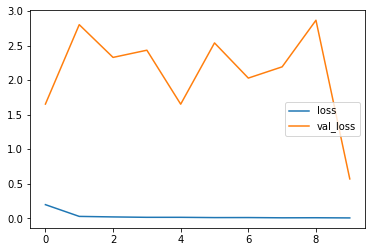

In [31]:
metrics[['loss', 'val_loss']].plot()

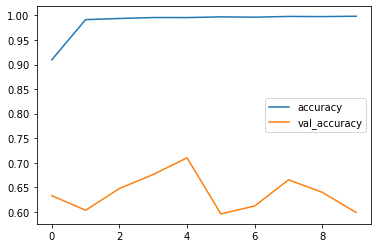

In [32]:
metrics[['accuracy', 'val_accuracy']].plot()

In [54]:
model.evaluate(X_test, y_test, verbose=0)

[5.129356143106458, 0.30375179648399353]

In [55]:
from sklearn.metrics import classification_report
prediction = model.predict_classes(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.33      0.22      0.26       792
           1       0.29      0.42      0.34       594

    accuracy                           0.30      1386
   macro avg       0.31      0.32      0.30      1386
weighted avg       0.31      0.30      0.30      1386



In [56]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(X_test)
confusion_matrix(y_test, prediction)

array([[171, 621],
       [344, 250]], dtype=int64)

In [57]:
prediction

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [58]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
X_test

array([[[[0.51764706, 0.58431373, 0.61960784],
         [0.54117647, 0.61176471, 0.63921569],
         [0.57647059, 0.65098039, 0.6627451 ],
         ...,
         [0.70588235, 0.77647059, 0.77254902],
         [0.71372549, 0.77254902, 0.78039216],
         [0.71764706, 0.77647059, 0.78823529]],

        [[0.11372549, 0.14117647, 0.2627451 ],
         [0.14117647, 0.17647059, 0.27843137],
         [0.18823529, 0.22745098, 0.31372549],
         ...,
         [0.70980392, 0.78039216, 0.78431373],
         [0.70588235, 0.77647059, 0.78039216],
         [0.70588235, 0.77647059, 0.78431373]],

        [[0.1254902 , 0.1254902 , 0.30588235],
         [0.1254902 , 0.12941176, 0.29803922],
         [0.12156863, 0.12941176, 0.28627451],
         ...,
         [0.70588235, 0.77647059, 0.78039216],
         [0.70980392, 0.78039216, 0.78431373],
         [0.71372549, 0.78039216, 0.79215686]],

        ...,

        [[0.23921569, 0.2       , 0.5254902 ],
         [0.30196078, 0.2627451 , 0.59607843]

In [71]:
# Create Sequential Model
model = Sequential()
model.add(Conv2D(8, (4, 4), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))



model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 147, 147, 8)       392       
_________________________________________________________________
activation_9 (Activation)    (None, 147, 147, 8)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 73, 73, 8)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 71, 16)        1168      
_________________________________________________________________
activation_10 (Activation)   (None, 71, 71, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8464)             

In [73]:
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [74]:
tf.debugging.set_log_device_placement(True)


#from tensorflow.keras.callbacks import EarlyStopping
#model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))
#3model.save('CNN_Model')
model.fit(
        train_generator,
        steps_per_epoch=500,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=200)


#from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', patience=4)
#model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[early_stop])
model.save('CNN_Model')

Epoch 1/10
500/500 [==============================] - 90s 180ms/step - loss: 0.4633 - accuracy: 0.7758 - val_loss: 0.7431 - val_accuracy: 0.5567
Epoch 2/10
500/500 [==============================] - 88s 176ms/step - loss: 0.1591 - accuracy: 0.9436 - val_loss: 2.0532 - val_accuracy: 0.5366
Epoch 3/10
500/500 [==============================] - 88s 175ms/step - loss: 0.0902 - accuracy: 0.9702 - val_loss: 1.6941 - val_accuracy: 0.5630
Epoch 4/10
500/500 [==============================] - 89s 177ms/step - loss: 0.0696 - accuracy: 0.9768 - val_loss: 1.4873 - val_accuracy: 0.5970
Epoch 5/10
500/500 [==============================] - 89s 179ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 4.8208 - val_accuracy: 0.5314
Epoch 6/10
500/500 [==============================] - 89s 179ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.9972 - val_accuracy: 0.6156
Epoch 7/10
500/500 [==============================] - 89s 178ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 1.1041 - val_ac

In [68]:
from sklearn.metrics import classification_report
prediction = model.predict_classes(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.35      0.40      0.38       792
           1       0.02      0.02      0.02       594

    accuracy                           0.24      1386
   macro avg       0.19      0.21      0.20      1386
weighted avg       0.21      0.24      0.22      1386



In [69]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(X_test)
confusion_matrix(y_test, prediction)

array([[320, 472],
       [583,  11]], dtype=int64)

In [70]:
prediction

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])